### Evaluación de métricas y variables de los modelos arborescentes

In [1]:
import sys
sys.path.append("../../") # go to parent dir

In [2]:
from modelos import *
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import pandas as pd
import calplot
from pandas import DatetimeIndex

In [3]:
pd.options.display.max_columns = 50 # para mostrar todas las columnas

#### Cargamos los datos de las metricas de MLFlow para evaluar los modelos

In [4]:
runs = pd.read_csv('runs/runs-forest.csv')
runs

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,bootstrap,max_depth,min_samples_leaf,min_samples_split,n_estimators,random_state,CV_TEST_RMSE,CV_TRAIN_RMSE,RANDOM SEED,TEST_MAX_ERROR,TEST_MEAN_ABS_ERROR,TEST_MEDIAN_ABS_ERROR,TEST_ROOT_MEAN_SQ_ERROR,Training Info
0,2024-04-28 23:26:07,11.6s,7e4e9122bf42408ca67879e80814625e,esc_rf_con_grid_search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,True,NaN,1.0,2.0,600.0,777,0.050450,0.006928,777,2.757000,0.272840,0.190750,0.406459,Random Forest donde los hiperparámetros se esc...
1,2024-04-28 22:52:00,13.7s,7af8fd9f47bc4d2696d8bdb0db616bc1,rf_con_grid_search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,True,28.0,1.0,2.0,600.0,777,0.050518,0.006938,777,2.673833,0.272288,0.190250,0.405576,Random Forest donde los hiperparámetros se esc...
2,2024-04-28 22:14:17,7.0s,ac393e54499545f78a1c7cab7bedad90,rf_con_random_search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,True,28.0,4.0,4.0,201.0,777,0.061129,0.024751,777,2.751724,0.272808,0.187096,0.408383,Random Forest donde los hiperparámetros se esc...
3,2024-04-28 22:12:06,5.7s,bb643a4e91564ecf9e88e21b4553c054,esc_random_forest_basico,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,NaN,10.0,NaN,NaN,NaN,777,0.262778,0.194255,777,2.762573,0.272665,0.187579,0.407846,Random Forest con todos los hiperparámetros pr...
4,2024-04-28 22:11:21,12.6s,481a8f31dc7442dca6bd58f018a51af3,random_forest_basico,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,NaN,10.0,NaN,NaN,NaN,777,0.262738,0.194271,777,2.627003,0.272408,0.188076,0.406955,Random Forest con todos los hiperparámetros pr...
5,2024-04-28 22:16:58,6.7s,c00c7aaa3a614762bd8110fcb260e756,esc_rf_con_random_search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,True,28.0,4.0,4.0,201.0,777,0.061150,0.024747,777,2.614159,0.273048,0.188845,0.388882,Random Forest donde los hiperparámetros se esc...


### RAIZ DE ECM por SUBCONJUNTOS

Pasamos a ver la diferencia entre el error (raiz del error cuadratico medio) de test de validación(CV_TEST_RMSE) con el error de train de validación (CV_TRAIN_RMSE) y el error sobre TEST (TEST_ROOT_MEAN_SQ_ERROR)

Text(0.5, 0, 'metros')

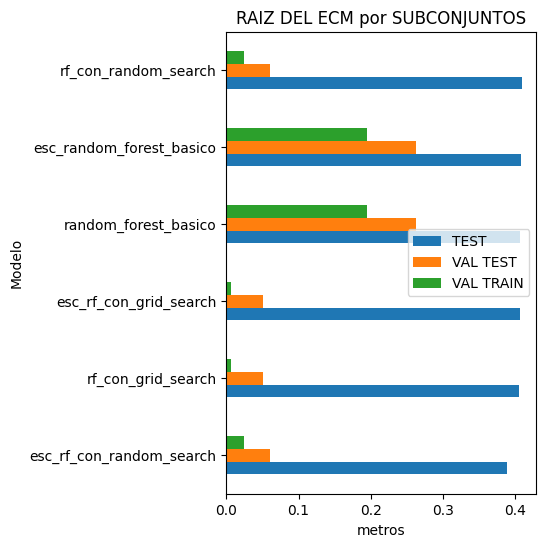

In [5]:
fig, ax = plt.subplots(figsize=(4,6))
runs = runs.sort_values(by='TEST_ROOT_MEAN_SQ_ERROR')

runs.plot(x = 'Name', y = ['TEST_ROOT_MEAN_SQ_ERROR', 'CV_TEST_RMSE', 'CV_TRAIN_RMSE' ], kind = 'barh', ax=ax)
plt.legend(['TEST', 'VAL TEST', 'VAL TRAIN'], loc='center right')
ax.set_title('RAIZ DEL ECM por SUBCONJUNTOS')
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

#### Viendo esta gráfica podemos apreciar que el error sobre test suele estar muy por encima de los errores de validación

#### Entre los conjuntos de validación, también podemos destacar que el error de train es menor que el error de test

#### Además, comentar que el error del test es muy similar entre modelos, aunque destaca el modelo de random_forest mediante random search con datos escalados.

### Otras métricas sobre el conjunto TEST
#### Asignamos los colores al mismo modelo para que coincidan en las graficas posteriores

In [6]:
colors = ['#6CCFF6', '#BFF6FF', '#FF95FD', '#FFF93E', 'green', 'red']
dictCol = dict(zip(runs.Name.unique(), colors))
runs['color'] = runs.Name.map(dictCol)

#### Error absoluto medio

Al no usar cuadrados y raices es una métrica más precisa del error

Text(0.5, 0, 'metros')

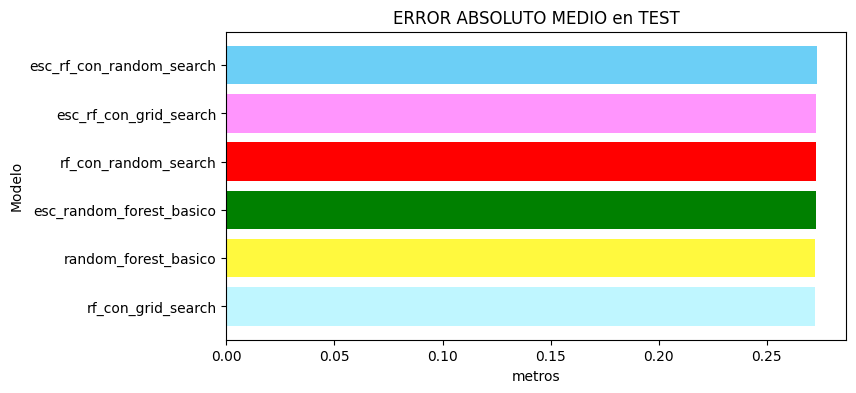

In [7]:
fig, ax = plt.subplots(figsize=(8,4))
runs = runs.sort_values(by='TEST_MEAN_ABS_ERROR')

ax.barh(y = runs['Name'], width = runs['TEST_MEAN_ABS_ERROR'], color=runs.color)
ax.set_title('ERROR ABSOLUTO MEDIO en TEST')
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

En esta métrica también están todos los modelos en la misma línea prácticamente por lo que no va a ser diferencial a la hora de elegir nuestro modelo.

#### Mediana del error absoluto

En vez de usar la media, usamos la mediana para que no afecten tanto los errores extremos

Text(0.5, 0, 'metros')

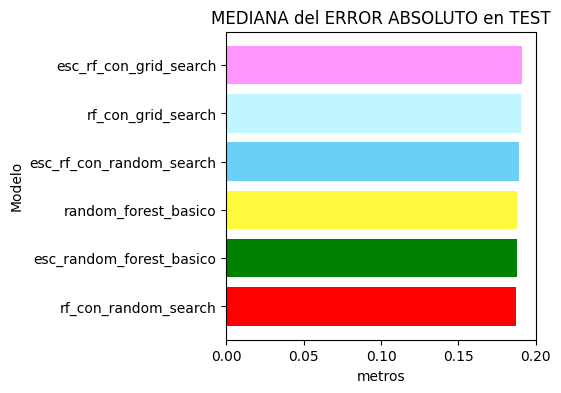

In [8]:
fig, ax = plt.subplots(figsize=(4,4))
runs = runs.sort_values(by='TEST_MEDIAN_ABS_ERROR')

ax.barh(y = runs['Name'], width = runs['TEST_MEDIAN_ABS_ERROR'], color=runs.color)
ax.set_title('MEDIANA del ERROR ABSOLUTO en TEST')
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

Para esta métrica ocurre lo mismo que para la métrica anterior: apenas se aprecia diferencia entre cada métrica observada.

#### Error máximo:
Métrica importante y nos ayudará a tener en cuenta que modelos pueden funcionar mejor para predecir alturas de olas de todos los rangos

Text(0.5, 0, 'metros (escala logaritmica)')

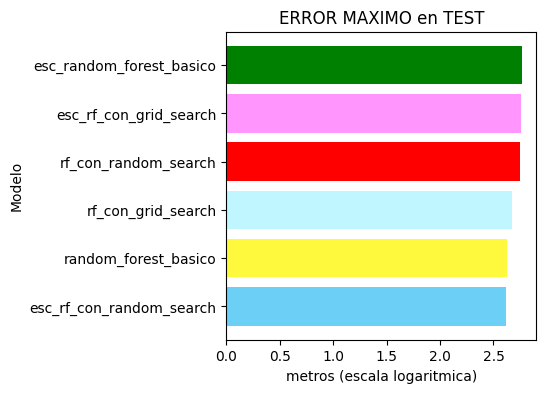

In [9]:
fig, ax = plt.subplots(figsize=(4,4))
runs = runs.sort_values(by='TEST_MAX_ERROR')

ax.barh(y = runs['Name'], width = runs['TEST_MAX_ERROR'], color=runs.color)
ax.set_title('ERROR MAXIMO en TEST')
ax.set_ylabel('Modelo')
ax.set_xlabel('metros (escala logaritmica)')

Para la última métrica y una de las cuales consideramos más importantes como es el ERROR MÁXIMO DE TEST encontramos que también son muy parejas pero destaca sobre el resto el modelo de random_forest mediante random search con datos escalados.

Como este modelo es bastante bueno en todas las métricas en general destacando en 2 de ellas consideramos que es el mejor modelo por el momento.

### Análisis de importancia de variables (valores de los coeficientes)

En esta seccion analisaremos los coeficientes de las variables en los modelos seleccionados.

In [10]:
# cargamos datos
X_train, X_test, y_train, y_test = sep_train_test()

#### Lo haremos separado para modelos escalados.y sin escalar, pues realmente no es una comparación igualada (aunque mas abajo lo juntaremos para ver las diferencias)

In [11]:
# las variables usadas en modelos sin utilizar seleccion
all_coef = X_train.drop(columns=["Temperatura", 'wspd', 'anio', 'mes', 'dia', 'hora']).columns

flo = MLFlow()

# cargamos los modelos con sus variables respectivas

models_sin_esc = [{'name': m, 'model': flo.get_saved_model(m), 'feature_names': all_coef} for m in runs.Name if 'esc' not in m]

models_escalados = [{'name': m, 'model': flo.get_saved_model(m), 'feature_names': all_coef} for m in runs.Name if 'esc' in m]

C:\Users\dacoq\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\store\artifact\utils\models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


#### Funcion auxiliar para guardar los datos correctamente para poder crear visualizaciones

In [12]:
def feat_weights_df(models):
    featureWeights = []
    for i,c in enumerate(all_coef):
        for item in models:
            featW = {'model': item['name'], 'coef': 0, 'color': 'black'}
    
            if (item['feature_names'] == c).sum() > 0: # si existe el coeficiente en el modelo
                featW['coef'] = item['model'].feature_importances_[item['feature_names'] == c][0]
                # color rojo indica que el coeficiente es negativo
                featW['color'] = 'blue' if featW['coef'] > 0 else 'red'
                featW['coef'] = abs(featW['coef'])
    
            featW['coef_name'] = c
            
            featureWeights.append(featW)
    # convertimos lista a dataframe
    return pd.DataFrame(featureWeights)

#### Funcion que se encargara de mostrar una rejilla de graficos para cada variable de cual es su peso en diferentes modelos

In [13]:
def mostrar_importancias(featureWeights, title):
    # ordenamos por coeficientes para que al mostrar sea mas facil evaluar
    featureWeights = featureWeights.sort_values(by = 'coef', ascending=False)
    
    fig, axs = plt.subplots(8,4, figsize=(15,30))
    fig.suptitle(title, fontsize=24)
    for i,c in enumerate(featureWeights.coef_name.unique()):
        df_temp = featureWeights[featureWeights.coef_name == c]
        df_temp = df_temp.sort_values(by='model')
        ax = axs[i//4, i%4]
        ax.barh(df_temp.model, df_temp.coef, color = df_temp.color)
        if i % 4 > 0:
            ax.set_yticks([])
        ax.set_title(c, fontweight='bold')
        ax.set_xticks([i/20 for i in range(0, 11, 5)])
        
    # leyenda custom
    # axs[0, 1].legend(handles=[mpatches.Patch(color='red', label='< 0'), mpatches.Patch(color='blue', label='> 0')])
    axs[7,3].axis('off')

#### Mostramos graficos para datos SIN escalar

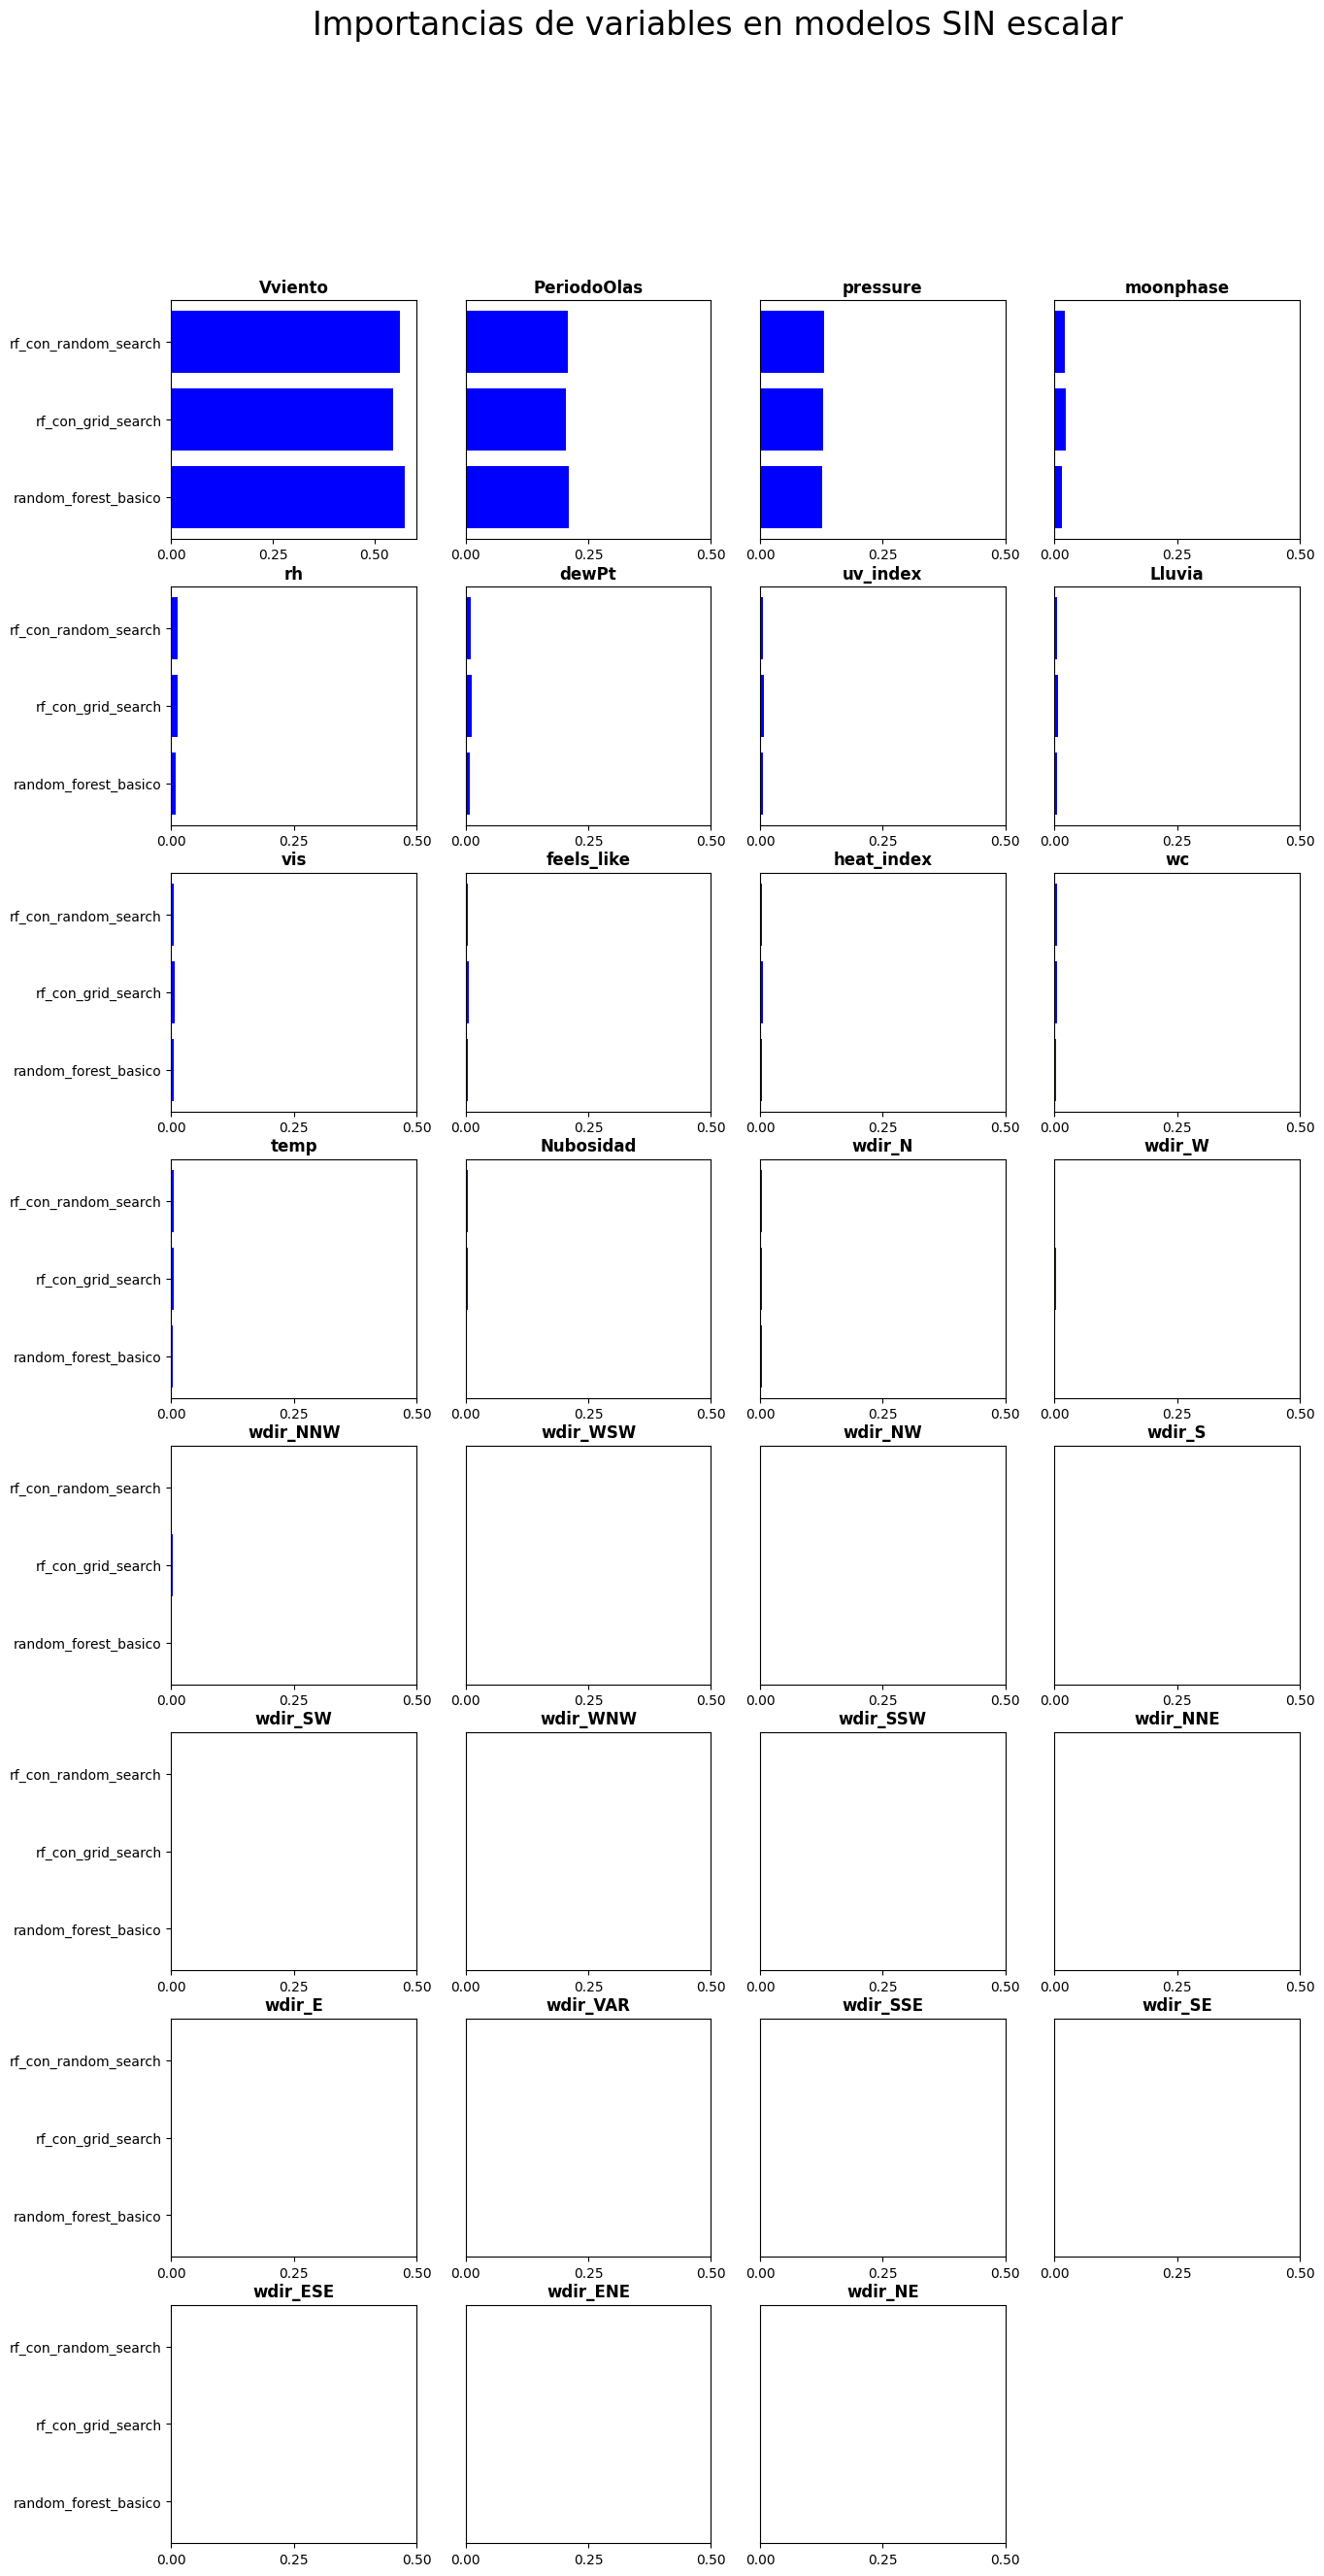

In [14]:
mostrar_importancias(feat_weights_df(models_sin_esc), "Importancias de variables en modelos SIN escalar")

#### En este caso, las variables de mayor peso son la velocidad del viento (Vviento), periodo de las olas,  presion y la fase lunar.


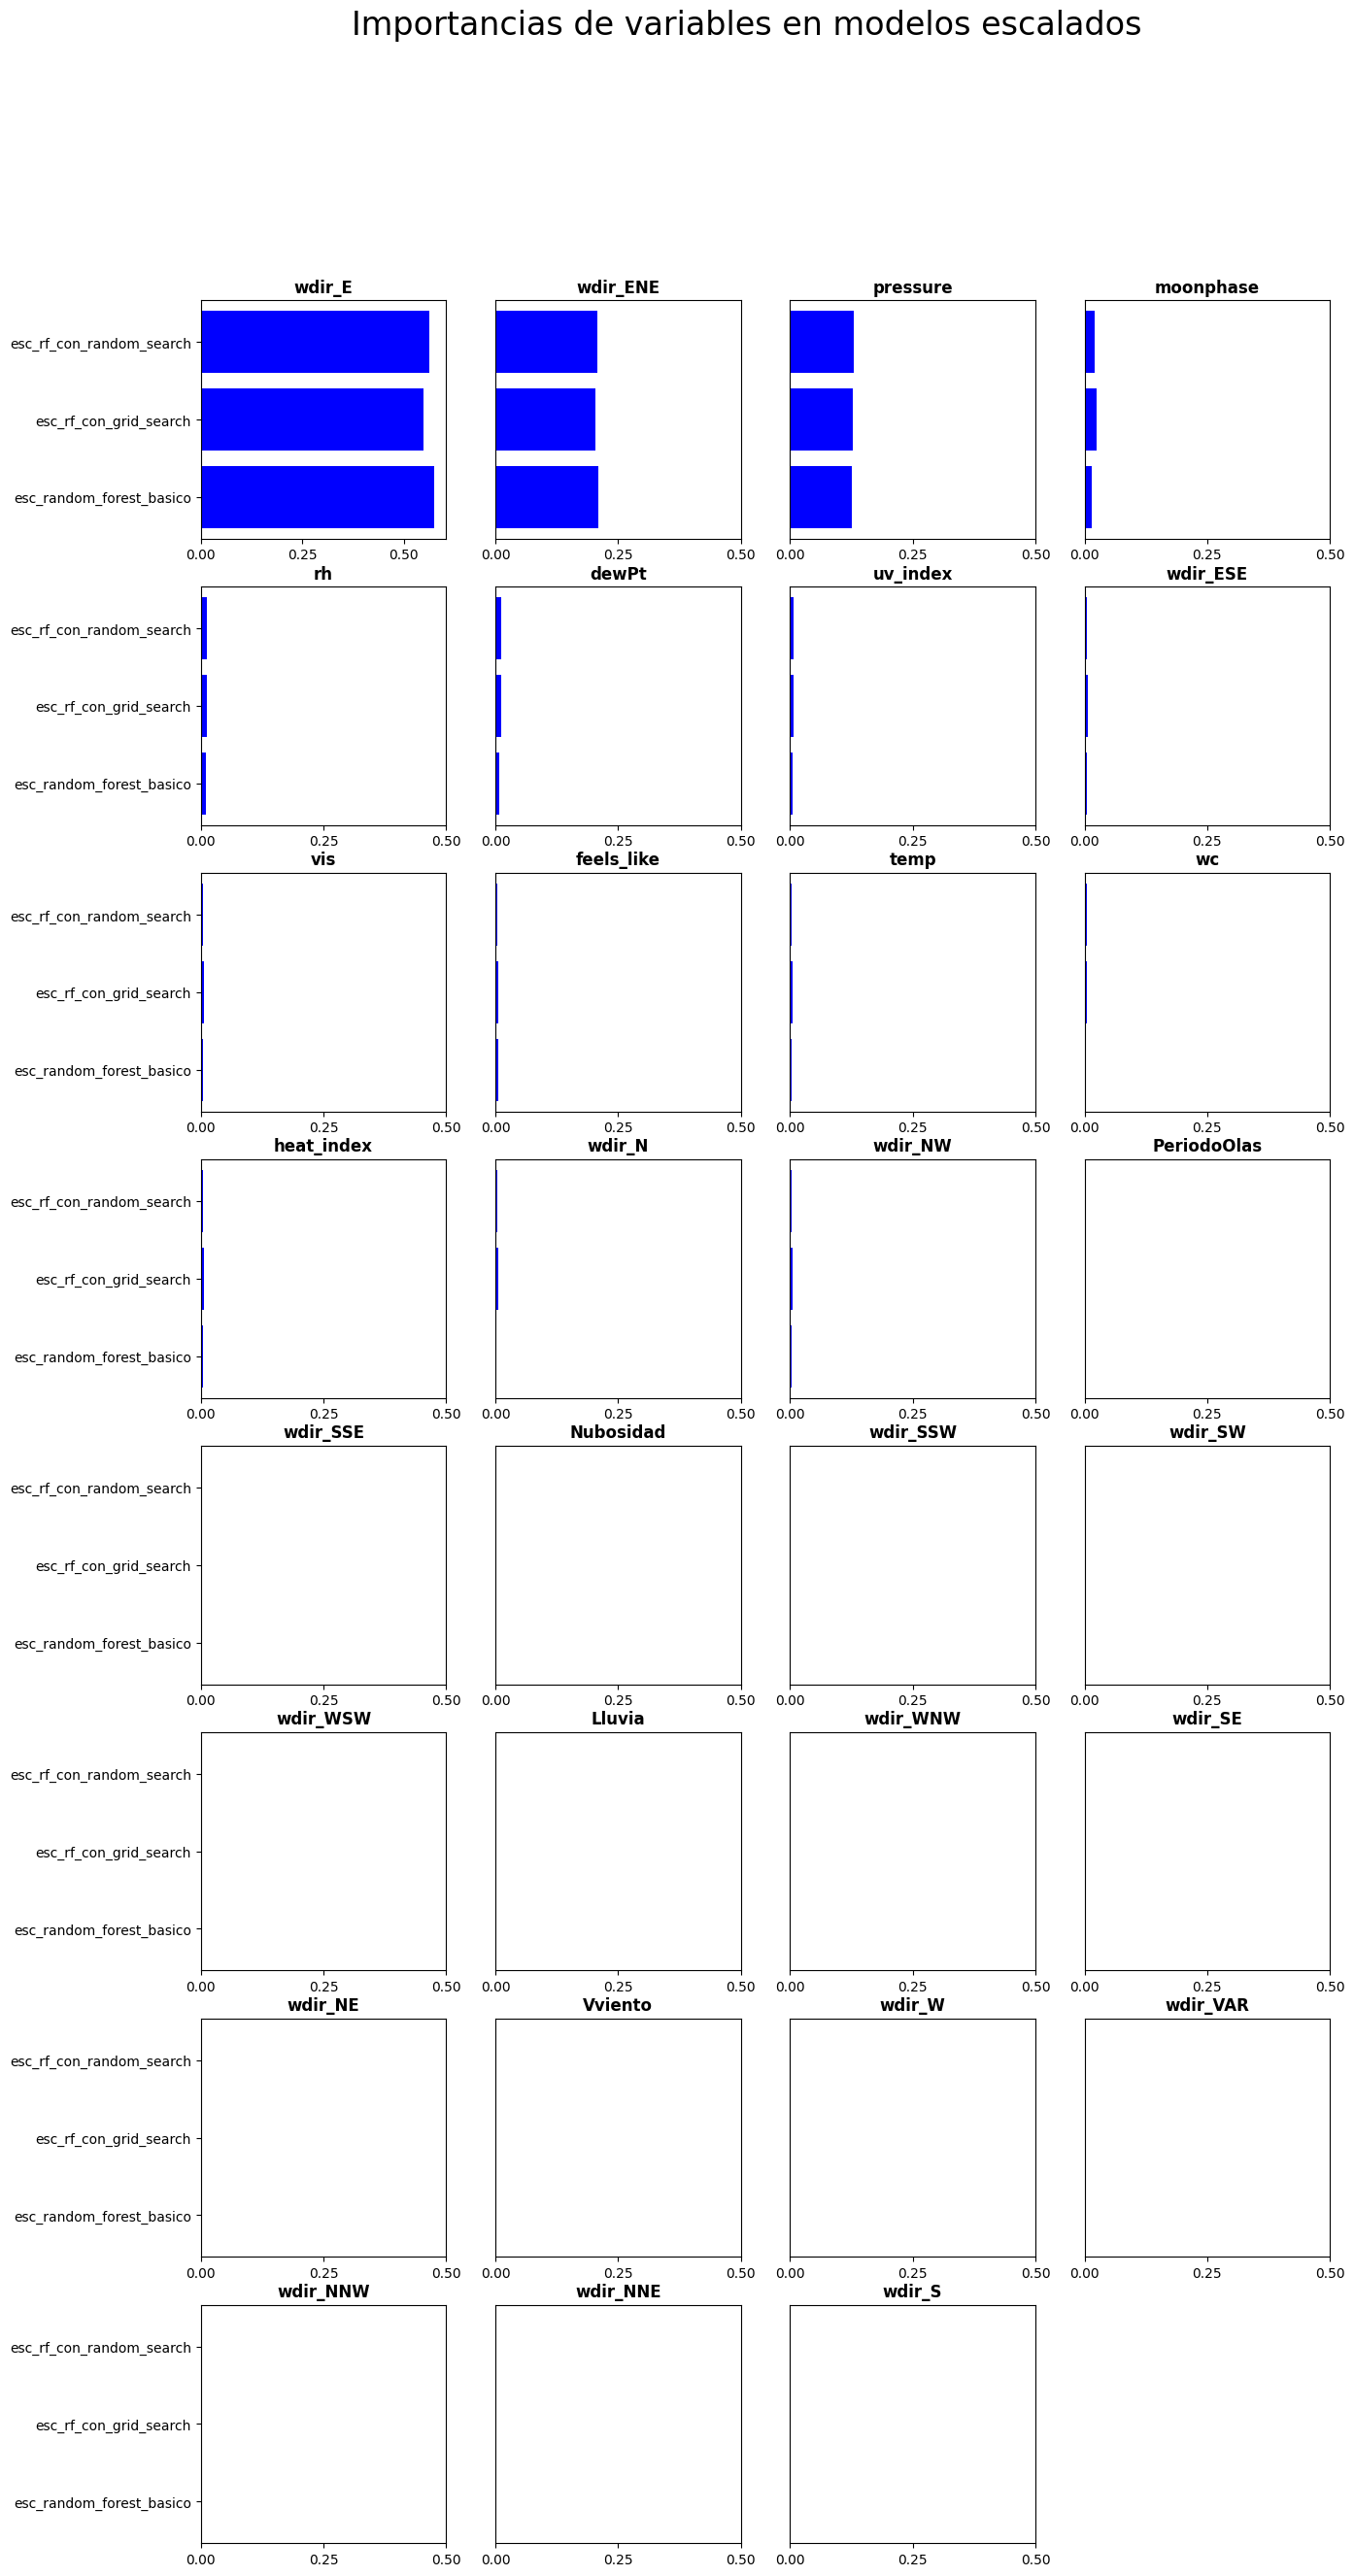

In [15]:
mostrar_importancias(feat_weights_df(models_escalados), "Importancias de variables en modelos escalados")

#### En este otro caso, las variables de mayor peso son wdir_E, wdir_ENE, presión y la fase lunar.


### Análisis de gráficas de dispersión (Y_true vs Y_predicted) por segmentos (Alturas de olas)

##### Separamos las olas en 4 grupos por rangos de altura:

In [16]:
def class_ola(ola):
    if (ola < 1):
        return "x<1"
    if (ola < 2):
        return "1<x<2"
    if (ola < 3):
        return "2<x<3"
    else:
        return "x>3"

<Axes: title={'center': 'Segmentación de olas'}>

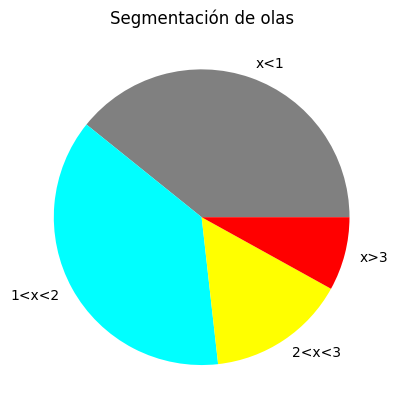

In [17]:
ola_clas = y_test.map(class_ola)
ola_clas.value_counts().plot(kind='pie', label='', title='Segmentación de olas', colors=['gray', "aqua", "yellow", "red"])

#### Funcion auxiliar para poder convertir el dataframe de test en uno lo que tiene que recibir el modelo como input


In [18]:
# Devuelve df_test modificado para que lo acepte el modelo m para hacer predict
def to_model_input(df_train, df_test, m):
    # Eliminamos las columnas repetidas y las columnas temporales (visto en el notebook del analisis)
    input_test = df_test.drop(columns=["Temperatura", 'wspd', 'anio', 'mes', 'dia', 'hora'])
    input_train = df_train.drop(columns=["Temperatura", 'wspd', 'anio', 'mes', 'dia', 'hora'])
    # if "auto" in m: no hay modelos automaticos, su rendimiento es muy bajo
    if "MANUAL" in m: # quitamos columnas
        cols = ['moonphase', 'temp', 'rh', 'pressure',
       'vis', 'uv_index', 'wdir_E', 'wdir_ENE', 'wdir_ESE', 'wdir_N',
       'wdir_NE', 'wdir_NNE', 'wdir_NNW', 'wdir_NW', 'wdir_S', 'wdir_SE',
       'wdir_SSE', 'wdir_SSW', 'wdir_SW', 'wdir_VAR', 'wdir_W', 'wdir_WNW',
       'wdir_WSW', 'Vviento', 'PeriodoOlas', 'Lluvia', 'Nubosidad']
        input_test = input_test[cols]
        input_train = input_train[cols]
    if "esc" in m: # escalamos datos
        scaler = ColumnTransformer(
            transformers=[
                # no escalonamos las dummy de dirección de viento
                ("num", StandardScaler(), [c for c in input_train.columns if not c.startswith('wdir_')]),
            ],
            remainder='passthrough'
        )
        scaler.fit(input_train)
        input_test = scaler.transform(input_test)
    
    return input_test

#### Asignamos colores a los diferentes rangos para visualizar los segmentos en los graficos de dispersion

In [19]:
def ola_color(ola):
    if (ola < 1):
        return "gray"
    if (ola < 2):
        return "aqua"
    if (ola < 3):
        return "yellow"
    else:
        return "red" 

C:\Users\dacoq\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\store\artifact\utils\models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])
C:\Users\dacoq\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\store\artifact\utils\models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_late

Text(0.5, 0.98, 'Alturas de olas: PREDICTED vs TRUE')

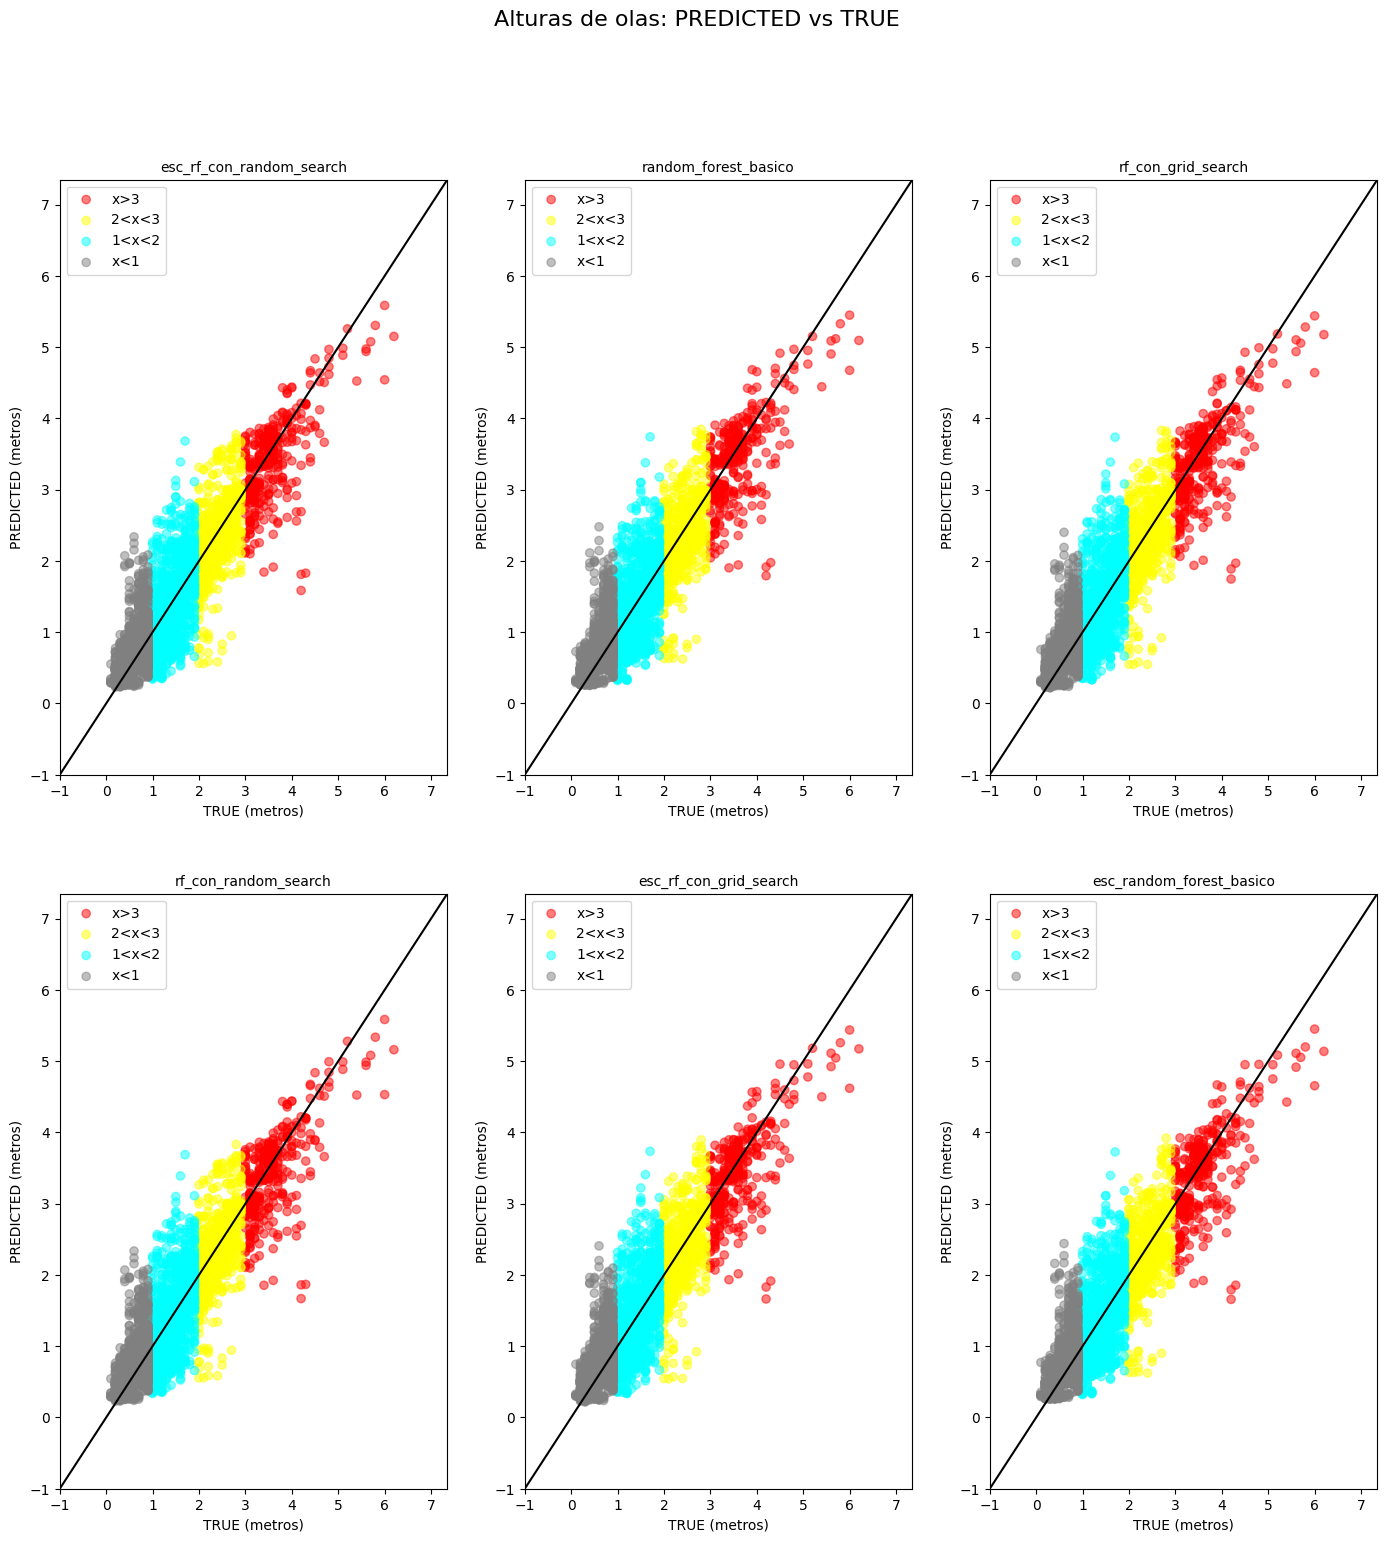

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(17, 17))
for i,m in enumerate(runs.Name):
    ax = axs[i// 3, i%3]
    flo = MLFlow()
    # cargamos el modelo
    model = flo.get_saved_model(m)
    y_pred = model.predict(to_model_input(X_train, X_test, m))
    for cl in ola_clas.unique():
        filter = ola_clas == cl
        ax.scatter(y_test[filter], y_pred[filter], color=y_test[filter].map(ola_color), alpha=0.5)
    
    # nuestra recta - objetivo
    ax.axline((0, 0), (7, 7), color="0")
    ax.legend(["x>3", "2<x<3", "1<x<2", "x<1"], loc='upper left')
    ax.set_xlabel('TRUE (metros)')
    ax.set_ylabel('PREDICTED (metros)')
    ax.set_title(m, fontsize=10)
    ax.set_xticks(np.linspace(-1, 7, 9))
    ax.set_yticks(np.linspace(-1, 7, 9))
#axs[2,2].axis('off')
fig.suptitle('Alturas de olas: PREDICTED vs TRUE', fontsize=16)

Comprobamos que los 6 modelos se comportan muy similarmente en la predicción por segmentos

#### Analisis de errores por dias

En esta sección analizaremos los errores viendolos como en un calendario

Primero vemos las distribuciones de olas por dias en nuestro conjunto TEST

Para ello primero definimos una función auxiliar para mostrar los datos en formato calendario

In [21]:
def plot_calendar(X_data, y_data, title, cmap = None, **kwargs):
    # unimos las columnas temporales con la y
    date_height_df = pd.concat([X_data[['anio', 'mes', 'dia', 'hora']].reset_index(drop=True), y_data.reset_index(drop=True)], axis=1)
    # renombramos las columnas para que se pueda convertir a datetimeindex
    date_height_df = date_height_df.rename({'anio': 'year', 'mes': 'month', 'dia': 'day', 'hora': 'hour'}, axis='columns')
    
    date_height_df.set_index(DatetimeIndex(pd.to_datetime(date_height_df[['year', 'month', 'day']])), inplace=True)
    # ya no necesitamos esta informacion, la tenemos en el indice
    date_height_df.drop(columns=['year', 'month', 'day'], inplace=True)
    
    # tenemos que agregar con la media porque son datos por hora y necesitamos los datos por dia
    date_height_df = date_height_df.groupby(date_height_df.index).agg({'AlturaOlas': 'mean'})
    if cmap is None:
        # para los colores https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale
        cvals  = [0, 1, 2, 3]
        colors = ['gray', "aqua", "yellow", "red"]
        
        norm=plt.Normalize(min(cvals),max(cvals))
        tuples = list(zip(map(norm,cvals), colors))
        cmap = LinearSegmentedColormap.from_list("", tuples)
    # mostramos el grafico
    calplot.calplot(date_height_df.AlturaOlas,
                    suptitle = title,
                    suptitle_kws = {'x': 0.4, 'y': 1.0, 'fontsize': 16},
                    cmap=cmap,
                    figsize=(15,4),
                    **kwargs)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


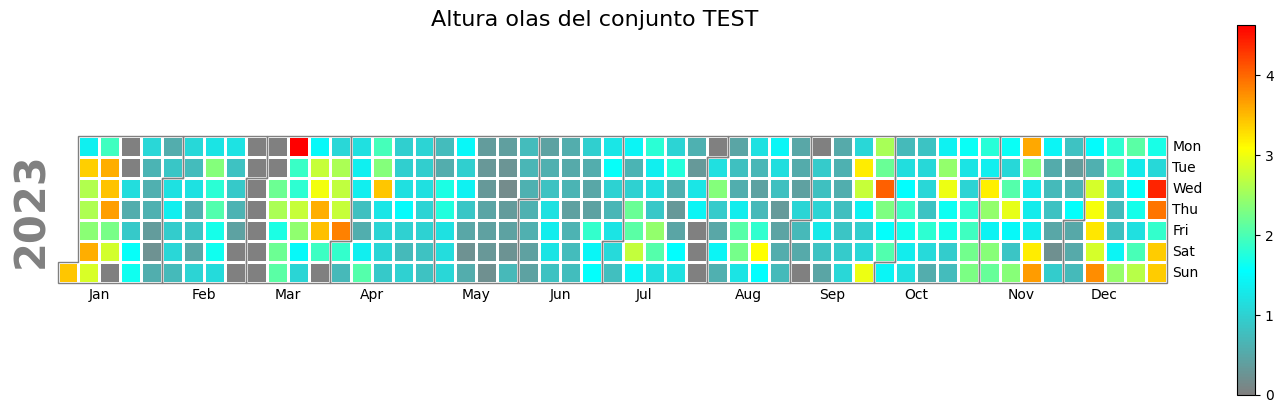

In [22]:
plot_calendar(X_test, y_test, 'Altura olas del conjunto TEST')

#### Vemos que las olas mayores de 3 metros se concentran principalmente en ENERO, MARZO y DICIEMBRE

#### Ahora pasamos a ver los errores del modelo cometidos en formato de calendario

#### El color azul significa que hemos SOBREESTIMADO la ola (subimos expectativas) y el color rojo que la hemos SUBESTIMADO (supone mayor riesgo al cliente)

##### Primero hacemos las graficas con colores que vayan del minimo al maximo para ver donde estan los mayores errores

C:\Users\dacoq\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\store\artifact\utils\models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


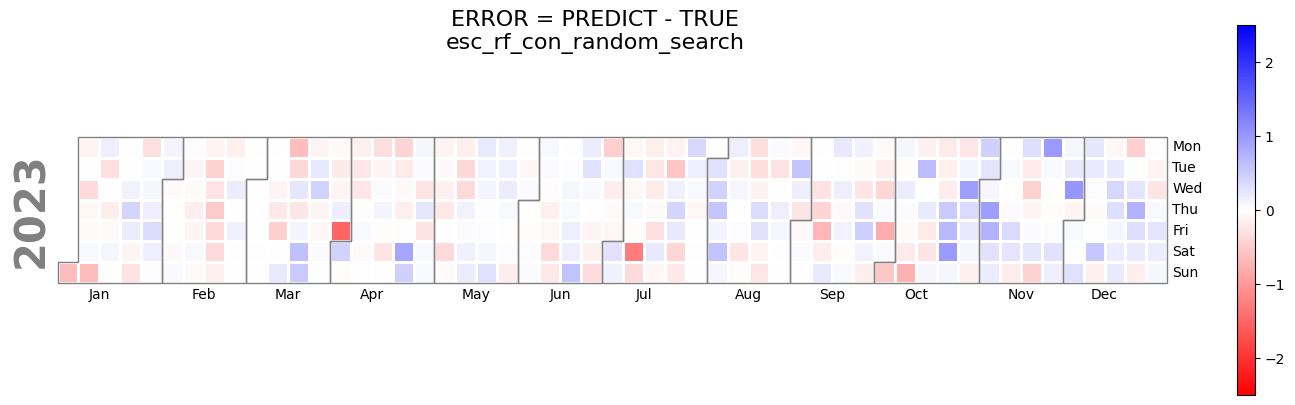

In [23]:
m = "esc_rf_con_random_search"

flo = MLFlow()
# cargamos el modelo
model = flo.get_saved_model(m)
# pasamos numpy a Series
y_pred = model.predict(to_model_input(X_train, X_test, m))

diff = y_pred - y_test
# para los colores https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale
cvals  = [-2.5, 0, 2.5]
colors = ['red', '1', 'blue']

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = LinearSegmentedColormap.from_list("", tuples)
plot_calendar(X_test, diff, 'ERROR = PREDICT - TRUE\n' + m, cmap, vmin=-2.5, vmax=2.5)


Podemos observar que el los errores aumentan durante el otoño cuando el modelo tiene a sobreestimar más las alturas de las olas.
Destacar que falla en 2 días de forma grave aunque es la media de las olas y quizás viene dado por un fenómeno natural atípico.
En cuanto al resto, parece un modelo que no se equivoca demasiado y es bastante estable.

### CONCLUSION

Por las razones descritas anteriormente, es decir, las mejores métricas y un buen rendimiento en el anáisis por tramos y fechas, hemos llegado a la conclusión que el modelo de random_forest mediante random search con datos escalados es el óptimo modelo entre todos los arborescentes.

In [24]:
runs[runs["Name"] == "esc_rf_con_random_search"][["bootstrap","max_depth","min_samples_leaf","min_samples_split","n_estimators"]]

,bootstrap,max_depth,min_samples_leaf,min_samples_split,n_estimators
5,True,28.0,4.0,4.0,201.0
